In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv("/Users/mac/Downloads/AI/深度学习数据集/kaggle-titanic-master/data/train.csv")

In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#把所有的数值类型做一个简单的统计
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#统计none值的个数
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 处理空值

In [24]:
#可以填充整个DataFrame里面的null值
#titanic.fillna()

#单独选择一列进行空值填充
#titanic.Age.fillna(0)

#年龄的中位数
median = titanic.Age.median()

#按年龄的中位数填充
titanic.Age.fillna(median,inplace=True)

In [25]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 从性别进行分析

In [5]:
titanic.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [3]:
#进行简单的统计，经常会用到
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
#生还人中，男女的人数
survived = titanic[titanic.Survived==1].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [9]:
#未生还人中，男女的人数
titanic[titanic.Survived==0].Sex.value_counts()

male      468
female     81
Name: Sex, dtype: int64

# 从年龄进行分析

In [3]:
#简单的统计
titanic.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

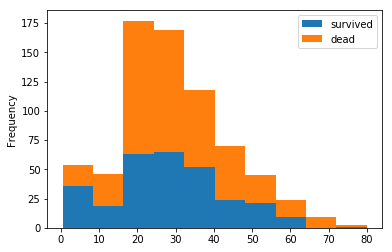

In [9]:
Survived = titanic[titanic.Survived==1].Age
dead = titanic[titanic.Survived==0].Age
df = pd.DataFrame([Survived,dead],index=['survived','dead'])
df = df.T
df.plot.hist(stacked=True)

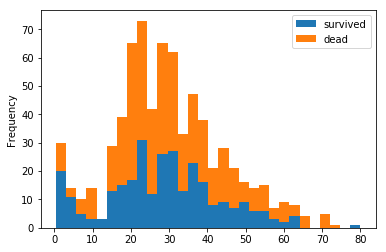

In [10]:
#直方图柱子多一点
df.plot.hist(stacked=True,bins=30)

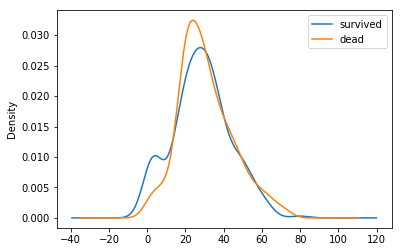

In [11]:
#密度图,更直观一点
df.plot.kde()

In [12]:
#可以查看年龄的分布，来决定图片横轴的取值范围
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

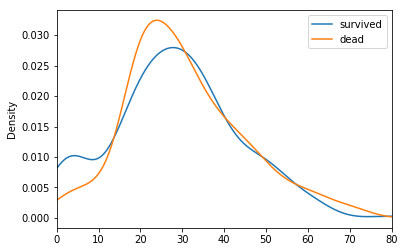

In [15]:
#限制取值范围
df.plot.kde(xlim=(0,80))

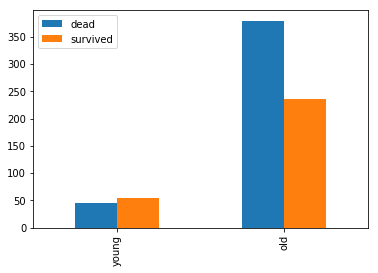

In [20]:
age = 16
young =  titanic[titanic.Age<=age]['Survived'].value_counts()
old = titanic[titanic.Age>age]['Survived'].value_counts()
df = pd.DataFrame([young,old],index=['young','old'])
df.columns = ['dead','survived']
df.plot.bar()

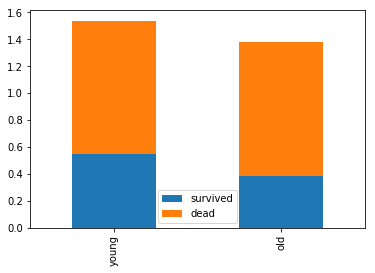

In [21]:
df['survived'] = df.survived /(df.survived+df.dead)
df['dead'] = df.dead / (df.survived+df.dead)
df[['survived','dead']].plot.bar(stacked=True)

# 分析票价

In [22]:
#票价和年龄特征相似
titanic.Fare

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

In [23]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

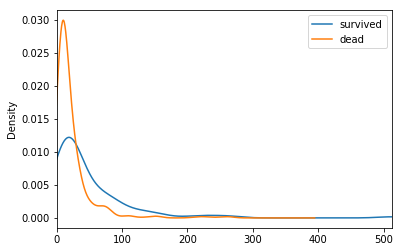

In [24]:
survived = titanic[titanic.Survived==1].Fare
dead = titanic[titanic.Survived==0].Fare
df = pd.DataFrame([survived,dead],index=['survived','dead'])
df = df.T
df.plot.kde(xlim=[0,512])

# 组合数据的分析

Text(0,0.5,'Fare')

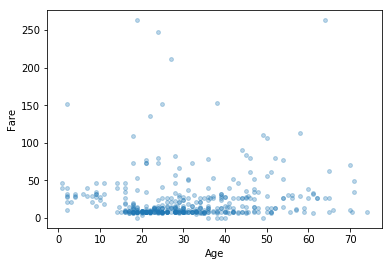

In [43]:
ax = plt.subplot()
Age = titanic[titanic.Survived==0].Age
Fare = titanic[titanic.Survived==0].Fare
plt.scatter(Age,Fare,s=15,marker='o',alpha=0.3)
ax.set_xlabel ('Age')
ax.set_ylabel('Fare')

# 隐含特征

In [45]:
titanic['title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [46]:
titanic.title.value_counts()
#比如有一个人年龄是不可知的，但他被称为Mr，这样就可以用所有Mr的年龄的平均值来代替，比直接用所有年龄的中位数更准确

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Lady              1
Ms                1
Capt              1
Sir               1
Don               1
the Countess      1
Mme               1
Name: title, dtype: int64